In [6]:
!uv pip install numpy matplotlib --quiet # noqa

*This response is supplemental to the `NotAllModelsAreWrong.ipynb` notebook elsewhere in this project.*

### CAS 598 Professor Sha Xin Wei

**Assignment 1**
*...in which we accidentally discover star clusters?*

Peter Dresslar

<p align="center">. . .</p>

**1 Data-Vis, Models, Simulations**
After looking at examples in this module, please use Reply to respond to the following in your own words:

- What’s the difference between data-vis, model, simulation?

- How is data ≠ information ≠ knowledge ≠ value (affect)?

- Provide an example / case demonstrating the truism: “All models are wrong, some are useful."


### What’s the difference between data-vis, model, simulation?

A data visualization is a graphical representation of data. It need not be attached to a model or simulation, though according to Grimm & Railsback (2005, p.357), 

> Equipping (a model's) software with graphical user interfaces... makes it especially easy for others to run, understand, and experiment with the IBM. GUIs facilitate what Grimm (2002) called “visual debugging,” which includes many elements of communication. 

The following is a data visualization.

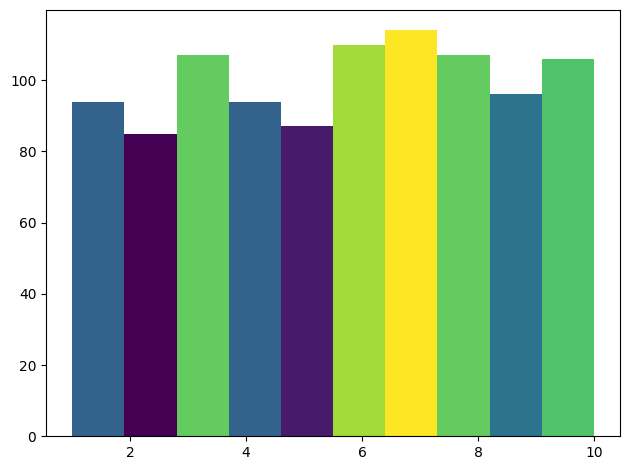

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

#1000 random integers between 1 and 10 inclusive
rng = np.random.default_rng()
viz_data = rng.integers(1, 10, 1000, dtype=int, endpoint=True) # high is exclusive by default on rng, for some reason!

# histogram using matplotlib
fig, ax = plt.subplots(tight_layout=True)

# Add colors. See: https://matplotlib.org/stable/gallery/statistics/hist.html#updating-histogram-colors
N, bins, patches = ax.hist(viz_data, bins=10)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.show()

A model differs from a data visualization quite significantly, not least because it would typically represent a real phenomenon or phenomena, whereas our data visualization above simply works with numbers. Again from Grimm And Railsback (2005, p. 22.):

> Intuitively, we know a model is some sort of simplified representation of a real system. But why do we build models, and what do models have in common? The answer is fundamental and independent of the context in which we build models: the purpose of modeling is to solve problems or answer questions, and the common feature of models is that they are developed under constraints (Starfield, Smith, and Bleloch 1990).

Here is a model from `NotAllModelsAreWrong`, with a visualization just to keep things interesting. Feel free to tweak the model params, `however_many_years`, and `dt`.

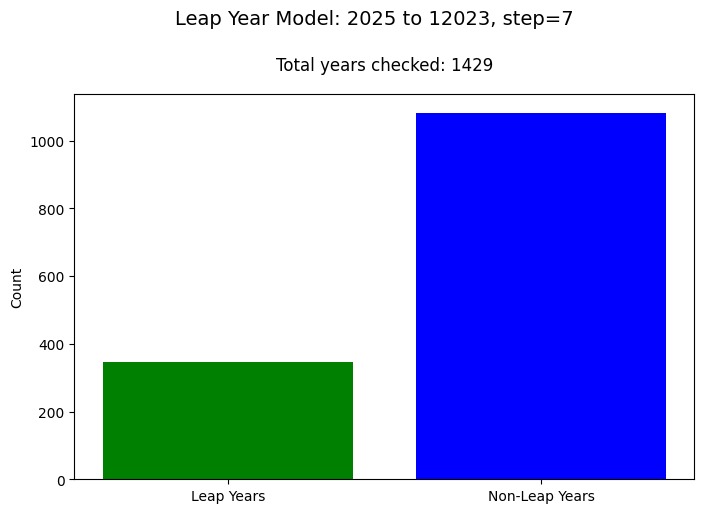

In [8]:
import datetime, time # noqa

however_many_years = 9999  # however many years to process
todays_year = datetime.datetime.now().year
start_year = todays_year  # or feel free to choose your own
dt = 7  # years to step

years_processed = 0
leap_count = 0
non_leap_count = 0

for year in range(start_year, start_year + however_many_years, dt):
    if year % 4 == 0 and (year % 100 != 0 or year % 400 == 0):
        leap_count += 1
    else:
        non_leap_count += 1
    years_processed += 1

# Simple bar plot
plt.figure(figsize=(8, 5))
plt.bar(['Leap Years', 'Non-Leap Years'], [leap_count, non_leap_count], 
        color=['green', 'blue'])

# Add title and total count
plt.suptitle(f'Leap Year Model: {start_year} to {start_year + however_many_years - 1}, step={dt}', y=1.05, fontsize=14)
plt.title(f'Total years checked: {years_processed}', y=1.04, fontsize=12)
plt.ylabel('Count')

plt.show()



A simulation differs from a model in that it refers to the actual processing of a system, possibly a model, rather than the structure of the system itself. From Banks (2000):

> Simulation is the imitation of the operation of a real-world process or system over time. Simulation involves the generation of an artificial history of the system, and the observation of that artificial history to draw inferences concerning the operating characteristics of the real system that is represented. 

I think there may be some gray area between simulations and models, but I suppose the easiest way to think of the two is where simulation is more of a verb (*e.g.*, something happens) and model is more of a noun.

A simulation should be quite easy to create from our model:

In [9]:
# super realistic future year leap year simulation!!1!

import datetime, time # noqa
from IPython.display import clear_output

years_from_now = 1002  # years from now to simulate
dt = 1  # seconds to step

sim_year = datetime.datetime.now().year + years_from_now

# we have to wrap the simulation in a try block since otherwise the sim crashes on halt
try:
    while True:
        clear_output(wait=True)  # clear the simulation space
        if sim_year % 4 == 0 and (sim_year % 100 != 0 or sim_year % 400 == 0):
            print(f"You are living in year {sim_year}, which is a leap year. Press stop on the cell to end this simulation.", end="", flush=True)
        else:
            print(f"You are living in year {sim_year}, which is not a leap year. Press stop on the cell to end this simulation.", end="", flush=True)
        time.sleep(dt)  #  Seconds.
        sim_year = datetime.datetime.now().year + years_from_now
except KeyboardInterrupt:
    print("Simulation ended.")
finally:
    print("Thank you for using the leap year simulation! Please deposit 25 cents for another simulation.")


You are living in year 3027, which is not a leap year. Press stop on the cell to end this simulation.Simulation ended.
Thank you for using the leap year simulation! Please deposit 25 cents for another simulation.


Ahem. Anyway. On to the next question.

<p align="center">🕰️ 🕰️ 🕰️</p>

### How is data ≠ information ≠ knowledge ≠ value (affect)?

In the following suite of small demonstrations, we will attempt to work from raw data, no more meaningful than noise, to a toy demonstration of a well known effect: the tendency for stellar clouds to condense into not only single stars but stellar clusters. While in the context of this homework we are primarily aiming for brevity, there should be a slight but real "ordering" of reason to these demonstrations. As the demonstrations grow more ordered, it might be noted that not only the data and processing change, but the context in which the demonstrations are presented also grows in scale.

In [11]:
# Data, but not information

import numpy as np

raw_data = np.random.default_rng().integers(0, 2, size=10000) # random binary data
pick_a_datum = np.random.randint(0, 10000)
print(pick_a_datum, raw_data[pick_a_datum])  # will output data but information content is about as low as it gets

1811 1


In [12]:
# Information, but not knowledge
import pandas as pd

information = pd.Series(raw_data).value_counts()
print(information)  # we are informed of the frequency of 0s and 1s in the data. As a bonus, we get type information.


1    5056
0    4944
Name: count, dtype: int64


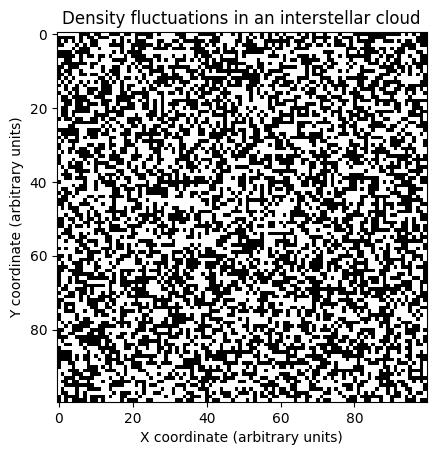

In [13]:
# Knowledge, but not value
import matplotlib.pyplot as plt

cloud = raw_data.reshape((100, 100)) # a nice, hopefully clumpy, 2D grid (a simplified "interstellar cloud")
                                     # while this is an extremely simple representation, the addition of context
                                     # and assertion of a phenomenon intended to be modeled
                                     # turns our data into knowledge, though of course with very little value

# Visualize the data as a density plot, see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
plt.imshow(cloud, cmap='gray', interpolation='none')
plt.title("Density fluctuations in an interstellar cloud")  #### CRITICAL for Knowledge: Context!
plt.xlabel("X coordinate (arbitrary units)")
plt.ylabel("Y coordinate (arbitrary units)")
plt.show()

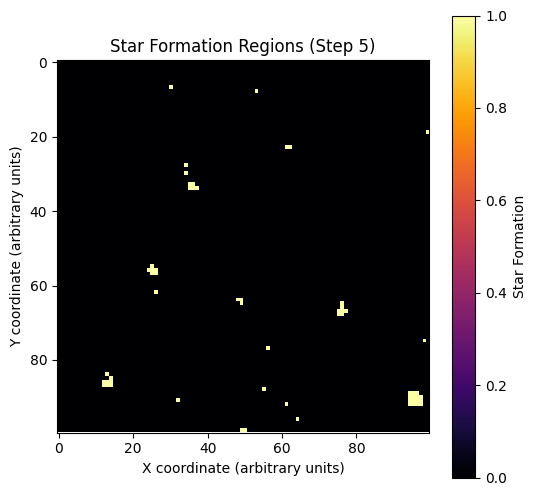

Thank you for using the star formation simulation! Please deposit 25 quanta of energy for another simulation.


In [90]:
# Data with information with knowledge with value

# A toy model of star formation. 
# Deterministic based on the outcome of the previous cells in this notebook: if you want different outcomes, re-run the previous cells starting with data!
# Please see wikipedia for more information on the star formation process: https://en.wikipedia.org/wiki/Star_formation

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

from scipy.ndimage import convolve

# params
star_steps = 5  # However many steps to run the model
density_threshold = 2.5  # Arbitrary. When changing, consider that gravity_kernel is in a relationship with this parameter.

cloud_density = cloud.astype(float) # un-disrcetize the cloud

# 5x5 gravitational kernel, weaker toward the edges in an approximate function: 1/r
gravity_kernel = np.array([
    [0.01, 0.02, 0.03, 0.02, 0.01],
    [0.02, 0.05, 0.08, 0.05, 0.02],
    [0.03, 0.08,  0.0, 0.08, 0.03],
    [0.02, 0.05, 0.08, 0.05, 0.02],
    [0.01, 0.02, 0.03, 0.02, 0.01]
])

try:
    for step in range(star_steps):
        clear_output(wait=True)

        # A bit of a hack, but it turns out that image processing and gravity are related functions! (?)
        cloud_density += convolve(cloud_density, gravity_kernel, mode='reflect')  # see https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html

        # Identify explicitly regions undergoing star formation
        stars = cloud_density > density_threshold

        plt.figure(figsize=(6, 6))
        plt.imshow(stars, cmap='inferno', interpolation='none')
        plt.title(f"Star Formation Regions (Step {step + 1})")
        plt.xlabel("X coordinate (arbitrary units)")
        plt.ylabel("Y coordinate (arbitrary units)")
        plt.colorbar(label="Star Formation")
        plt.show()

        cloud_density[stars] = 0  # Stars have to "clear out" the gas in their vicinity to form, and if we do not do this in the simulation, entropy will just go to zero. Try commenting this out and see what happens!
except KeyboardInterrupt:
    print("Simulation ended.")
finally:
    print("Thank you for using the star formation simulation! Please deposit 25 quanta of energy for another simulation.")


<p align="center">⭐ ⭐ ⭐</p>

### Provide an example / case demonstrating the truism: “All models are wrong, some are useful."

Please see my notebook, `NotAllModelsAreWrong.ipynb`, which is in the same directory as this one. 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/peterdresslar/not-all-models-are-wrong/blob/main/NotAllModelsAreWrong.ipynb)

---

### Notes

No notes!

### References

Banks, J. (2000). Introduction to Simulation. Proceedings of the 2000 Winter Simulation Conference. 

Grimm, V., & Railsback, S. F. (2005). Individual-based Modeling and Ecology. Princeton University Press.

Wikipedia. (2025). Star formation. In Wikipedia. Retrieved 2025, from https://en.wikipedia.org/wiki/Star_formation